In [7]:
import pandas as pd
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7f8510b206d0>,
 [Text(0.9729834021132444, 0.5131308792229684, 'anger'),
  Text(0.07713058297289747, 1.0972925194177992, 'disgust'),
  Text(-0.7544988369189038, 0.8004570601150455, 'fear'),
  Text(-0.9706877829352397, -0.5174603637577174, 'joy'),
  Text(0.38719424277042214, -1.0296021650936054, 'sadness'),
  Text(1.0175994796830845, -0.41772155672016226, 'surprise')],
 [Text(0.5307182193344969, 0.2798895704852555, '15.4%'),
  Text(0.042071227076125886, 0.5985231924097086, '16.9%'),
  Text(-0.4115448201375839, 0.43661294188093386, '9.4%'),
  Text(-0.5294660634192216, -0.2822511075042095, '32.1%'),
  Text(0.2111968596929575, -0.5616011809601483, '13.8%'),
  Text(0.5550542616453188, -0.2278481218473612, '12.4%')])

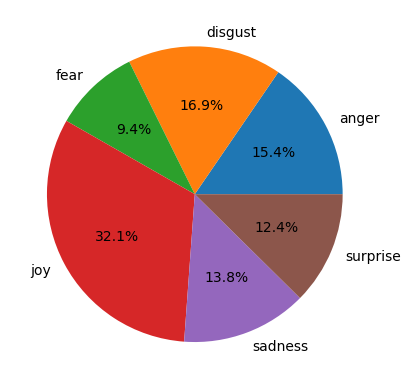

In [45]:
df = pd.read_csv('../data/emotion_from_transcript/emotion-english-distilroberta-base/jazzaar-20230417-afternoon-JFLB-Cuban-Vocals-video Philipp.csv', index_col=0)
df.sum()
labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
sizes = [df.sum()[label] for label in labels]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


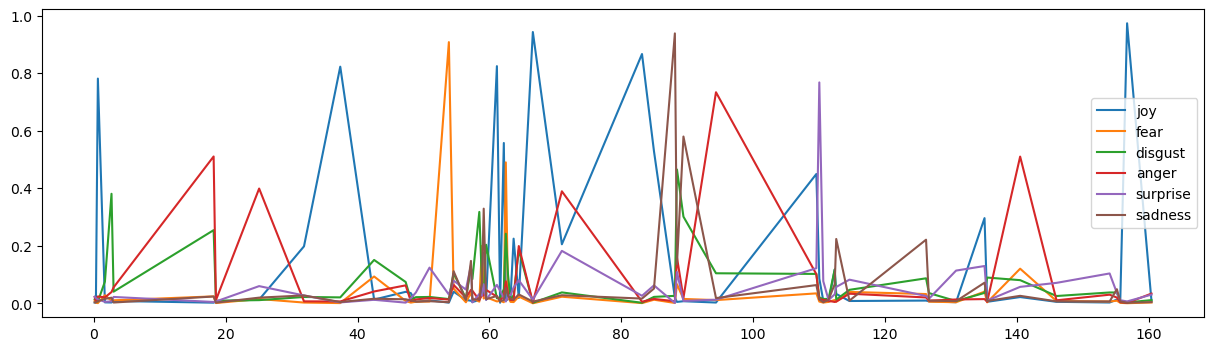

In [52]:
plt.figure(figsize=(15, 4))
plt.plot(df.start/60, df['joy'], label = "joy")
plt.plot(df.start/60, df['fear'], label = "fear")
plt.plot(df.start/60, df['disgust'], label = "disgust")
plt.plot(df.start/60, df['anger'], label = "anger")
plt.plot(df.start/60, df['surprise'], label = "surprise")
plt.plot(df.start/60, df['sadness'], label = "sadness")
plt.legend()
plt.show()

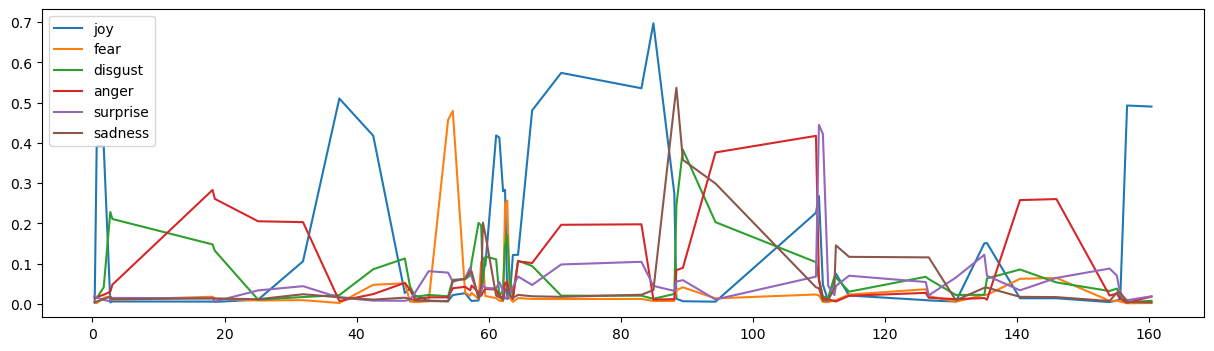

In [56]:
df_mean = df.rolling(2).mean()
df_mean['start']=df['start']
df_mean.drop(0, axis=0)
plt.figure(figsize=(15, 4))
plt.plot(df_mean.start/60, df_mean['joy'], label = "joy")
plt.plot(df_mean.start/60, df_mean['fear'], label = "fear")
plt.plot(df_mean.start/60, df_mean['disgust'], label = "disgust")
plt.plot(df_mean.start/60, df_mean['anger'], label = "anger")
plt.plot(df_mean.start/60, df_mean['surprise'], label = "surprise")
plt.plot(df_mean.start/60, df_mean['sadness'], label = "sadness")
plt.legend()
plt.show()

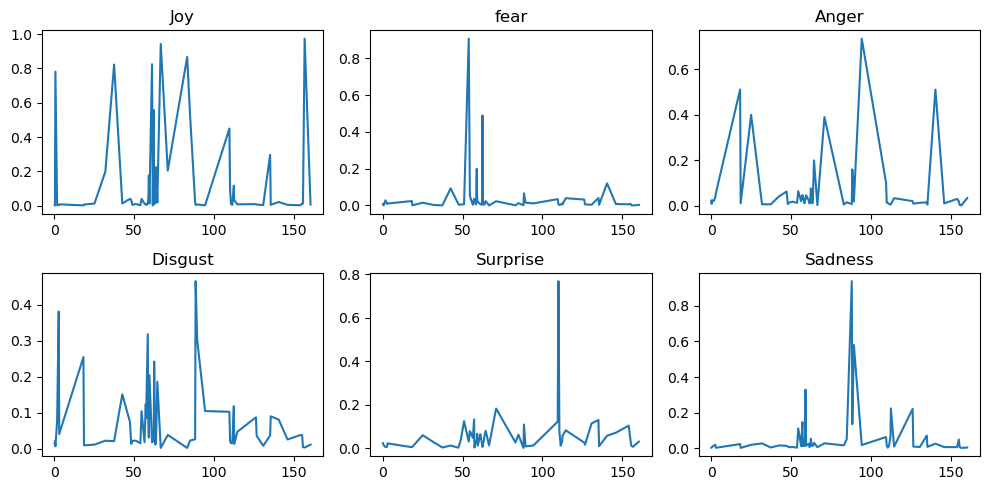

In [59]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plot line plots on each subplot
axs[0, 0].plot(df.start/60, df['joy'])
axs[0, 0].set_title('Joy')

axs[0, 1].plot(df.start/60, df['fear'])
axs[0, 1].set_title('fear')

axs[0, 2].plot(df.start/60, df['anger'])
axs[0, 2].set_title('Anger')

axs[1, 0].plot(df.start/60, df['disgust'])
axs[1, 0].set_title('Disgust')

axs[1, 1].plot(df.start/60, df['surprise'])
axs[1, 1].set_title('Surprise')

axs[1, 2].plot(df.start/60, df['sadness'])
axs[1, 2].set_title('Sadness')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


([<matplotlib.patches.Wedge at 0x7f8510331a90>,
 [Text(0.9401342484196694, 0.5710933329573928, 'anger'),
  Text(-0.8205526289233053, 0.732593600277161, 'disgust'),
  Text(-0.784222456811564, -0.7713592796047993, 'fear'),
  Text(-0.405742622152456, -1.022434802111533, 'joy'),
  Text(0.0717467755342605, -1.0976576880796838, 'sadness'),
  Text(0.8778831156283524, -0.6628131224520657, 'surprise')],
 [Text(0.5128004991380014, 0.31150545434039606, '17.4%'),
  Text(-0.4475741612308937, 0.39959650924208784, '42.0%'),
  Text(-0.4277577037153985, -0.4207414252389814, '5.9%'),
  Text(-0.22131415753770325, -0.5576917102426543, '7.4%'),
  Text(0.03913460483686936, -0.5987223753161911, '6.8%'),
  Text(0.47884533579728306, -0.36153443042839944, '20.6%')])

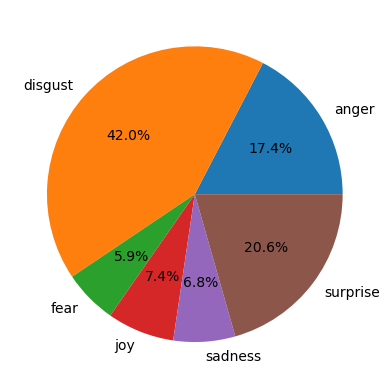

In [60]:
df = pd.read_csv('../data/emotion_from_transcript/emotion-english-distilroberta-base/JFBB_Rhythm_Section_Day1_Morning Thomas.csv', index_col=0)
df.sum()
labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
sizes = [df.sum()[label] for label in labels]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

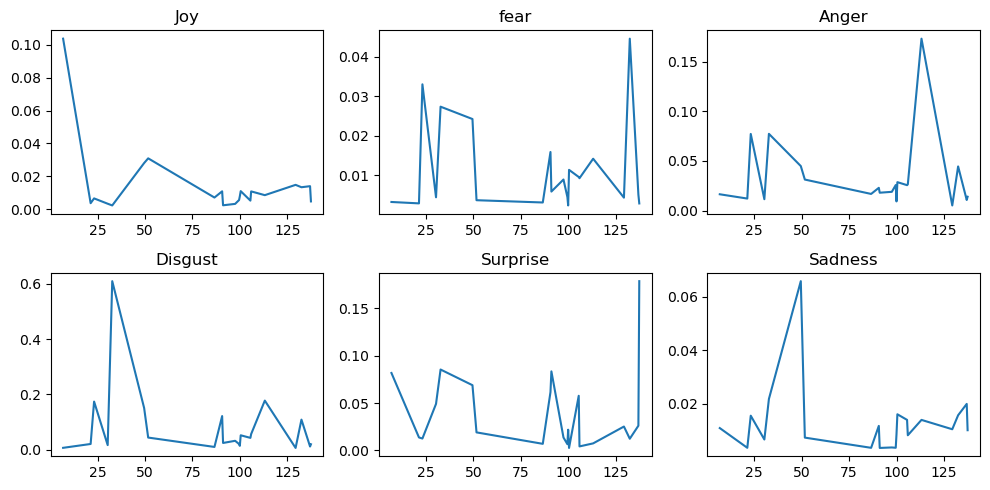

In [61]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plot line plots on each subplot
axs[0, 0].plot(df.start/60, df['joy'])
axs[0, 0].set_title('Joy')

axs[0, 1].plot(df.start/60, df['fear'])
axs[0, 1].set_title('fear')

axs[0, 2].plot(df.start/60, df['anger'])
axs[0, 2].set_title('Anger')

axs[1, 0].plot(df.start/60, df['disgust'])
axs[1, 0].set_title('Disgust')

axs[1, 1].plot(df.start/60, df['surprise'])
axs[1, 1].set_title('Surprise')

axs[1, 2].plot(df.start/60, df['sadness'])
axs[1, 2].set_title('Sadness')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()